In [2]:
# Cell 1: Import libraries and load data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the data (we don't need the target column for clustering)
df = pd.read_csv('../data/final_selected_features_heart_disease.csv')
X = df.drop('target', axis=1)
y_true = df['target'] # Keep the true labels for later comparison

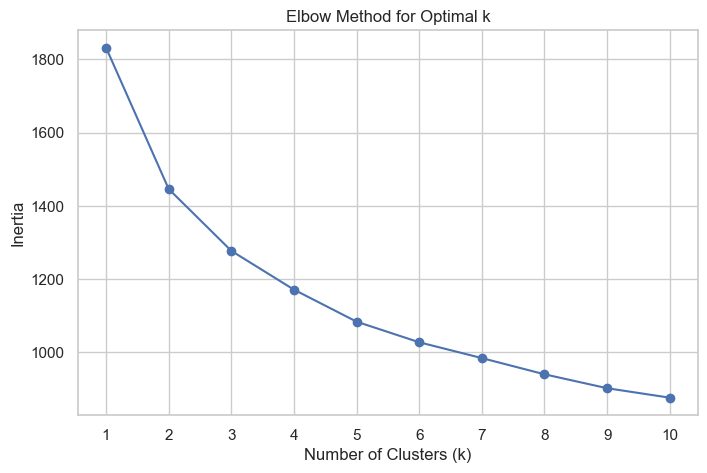

In [3]:
# Cell 2: Find the optimal number of clusters (k) using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [4]:
# Cell 3: Apply K-Means with the chosen k and compare to actual labels
optimal_k = 2 # Based on the problem (disease vs. no disease)
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)

# Compare the clusters with the actual labels
comparison_df = pd.DataFrame({'Cluster': cluster_labels, 'Actual': y_true})
print("Comparison of K-Means Clusters and Actual Labels:")
print(pd.crosstab(comparison_df['Cluster'], comparison_df['Actual']))

Comparison of K-Means Clusters and Actual Labels:
Actual     0   1
Cluster         
0        123  44
1         41  95


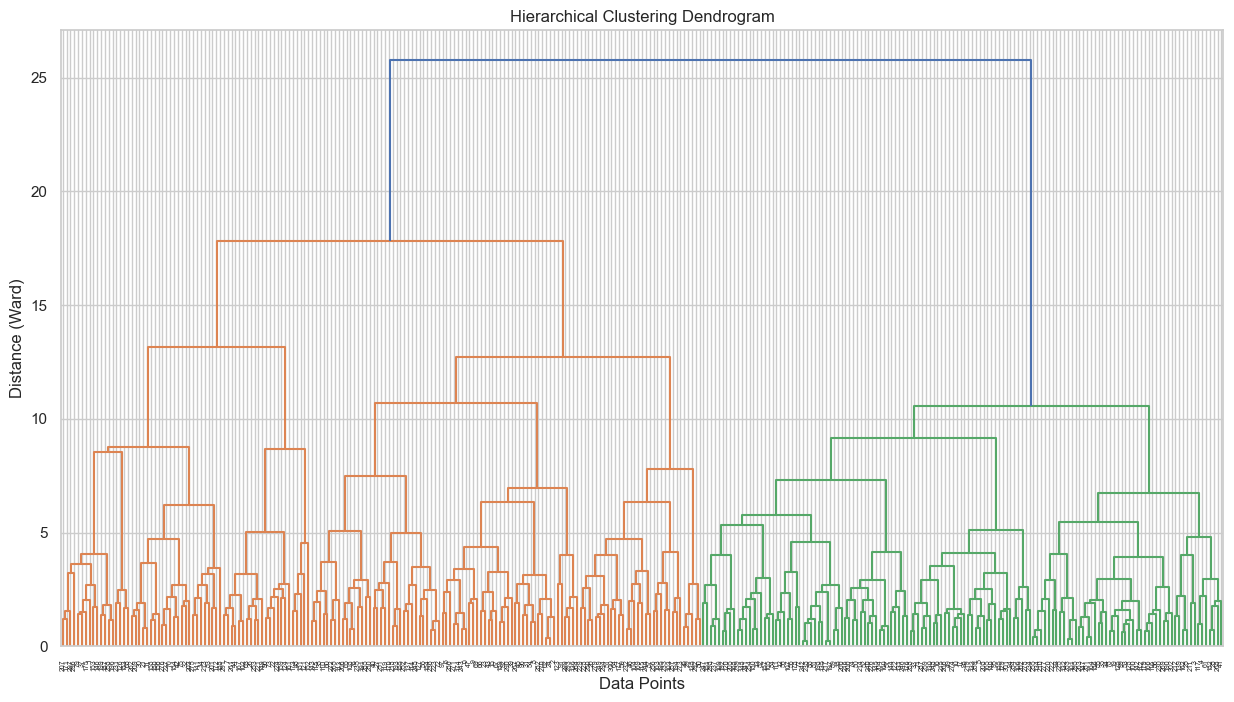

In [5]:
# Cell 4: Perform Hierarchical Clustering and visualize with a Dendrogram
# Create the linkage matrix
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked,
           orientation='top',
           labels=None, # Hiding labels for clarity
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance (Ward)')
plt.show()